In [59]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

In [45]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [46]:
svc = svm.SVC(kernel="linear")
# Return numbers spaced evenly on a log scale.（start , end , nums）
C_s = np.logspace(-10, 0, 10)
scores = list()
scores_std =list()

In [47]:
for C in C_s:
    svc.C = C
   # k_fold = KFold(n_splits=4)
    this_scores = cross_val_score(svc, X_digits,y_digits,cv=None, n_jobs=1)
   #print((this_scores))
    scores.append(np.mean(this_scores))
    #Compute the standard deviation along the specified axis.
    scores_std.append(np.std(this_scores))

loc[ 0.   0.2  0.4  0.6  0.8  1.   1.2],labels<a list of 7 Text yticklabel objects>
['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2']


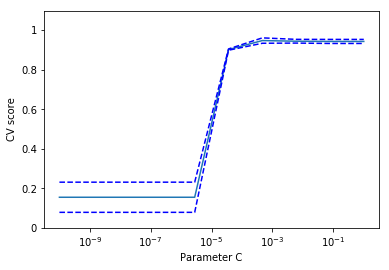

In [58]:
import matplotlib.pyplot as plt
#
plt.figure()
# clean the figture
plt.clf()
# Make a plot with log scaling on the x axis.
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
## Get locations and labels
locs, labels = plt.yticks()
#print("loc{},labels{}".format(locs, labels))
## Set locations and labels
#print(list(map(lambda x:"%g"%x, locs)))
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

In [60]:
Cs = np.logspace(-6, -1, 10)

In [61]:
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=1)

In [62]:
clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
clf.best_score_

0.92500000000000004

In [64]:
clf.best_estimator_.C

0.0077426368268112772

In [65]:
clf.score(X_digits[1000:], y_digits[1000:])

0.94353826850690092

In [66]:
cross_val_score(clf, X_digits, y_digits)

array([ 0.93853821,  0.96327212,  0.94463087])